# 1. Code lại code trong file pdf 

## Import thư viện 

In [17]:
from sklearn.datasets import make_blobs
from ipywidgets import interact, fixed
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('seaborn-whitegrid')


C:\Users\votua\AppData\Local\Temp\ipykernel_3256\831259834.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Khởi tạo dữ liệu 50 điểm và 2 cụm

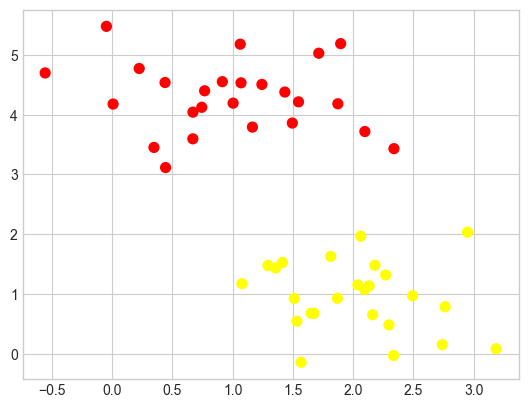

In [18]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()


## Vẽ đường thẳng phân tách 2 cụm

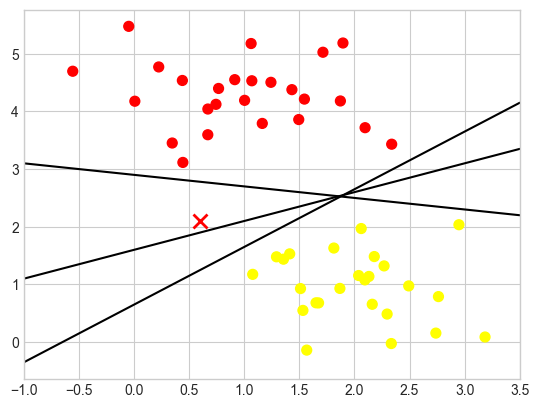

In [19]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit+b, '-k')

plt.xlim(-1, 3.5)
plt.show()


## Vẽ siêu phẳng lề lớn

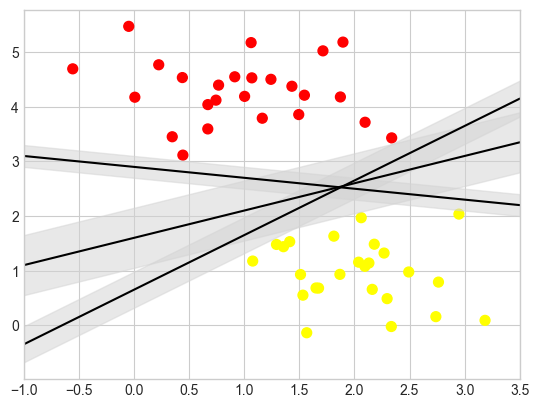

In [20]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit+b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit+d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5)
plt.show()


## Sử dụng SVC của sklearn để huấn luyện SVM và vẽ biên quyết định

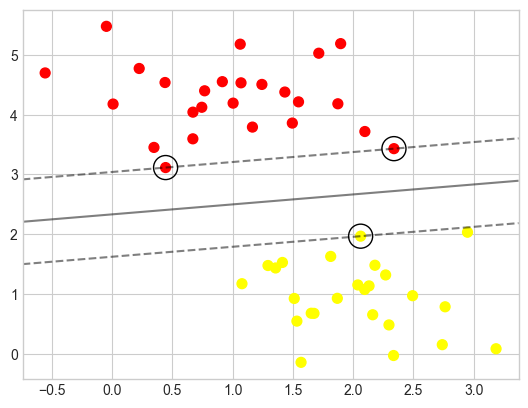

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [21]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)


def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[
                   :, 1], s=300, linewidth=1, edgecolors='black', facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_


## Khởi tạo dữ liệu 50 điểm không linearly separable

C:\Users\votua\AppData\Local\Temp\ipykernel_3256\129738341.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


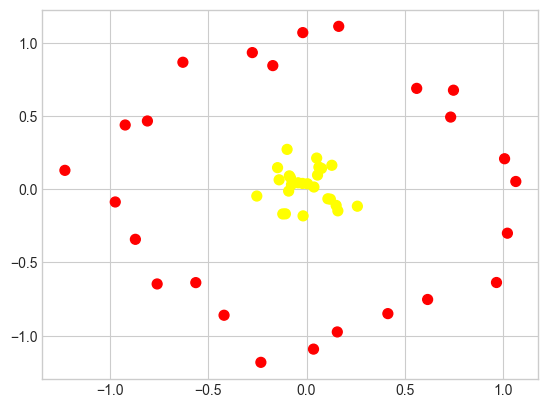

In [22]:
from mpl_toolkits import mplot3d
from sklearn.datasets import make_blobs, make_circles
from ipywidgets import interact, fixed
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('seaborn-whitegrid')


X, y = make_circles(50, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()


## Vẽ dữ liệu không gian 3 chiều

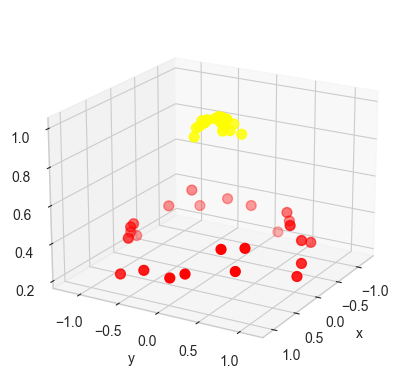

In [23]:
r = np.exp(-(X**2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()


## Huẩn luyện mô hình SVC với radial kernel

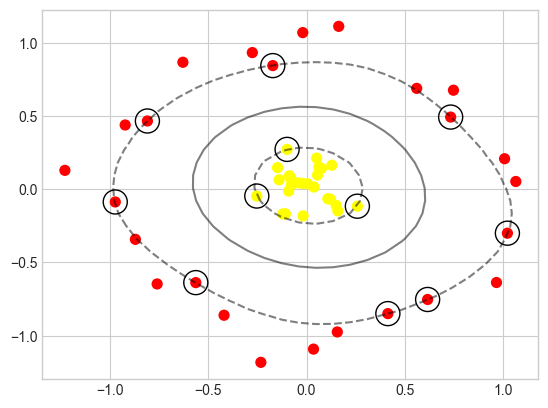

array([[-0.56291348, -0.63838361],
       [ 1.02114988, -0.30073127],
       [ 0.61559573, -0.75359677],
       [-0.17146802,  0.84431616],
       [-0.97236663, -0.0873982 ],
       [ 0.41346308, -0.85017126],
       [ 0.73269005,  0.49268545],
       [-0.80893175,  0.46594303],
       [-0.09881352,  0.27197703],
       [-0.25280517, -0.04686221],
       [ 0.25846848, -0.11631243]])

In [24]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_


## SVC cho tập dữ liệu banknote authentication

## Đọc dữ liệu từ file ``data_banknote_authentiacation.csv``

In [25]:
import pandas as pd
banknote = pd.read_csv('data_banknote_authentication.csv', header=None)
banknote


,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Có thể thấy dữ liệu gồm 4 biến features và 1 biến mục tiêu

## Chia dữ liệu thành biến features ``X`` và biến mục tiêu ``y``

In [26]:
X = banknote.values[:, :-1]
y = banknote.values[:, -1]


## Vì biến features có 4 chiều không thể visualize được nên em sẽ sử dụng PCA để đưa về 2 chiều

In [27]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X)
pca2_df = pd.DataFrame(pca2.transform(X), columns=["pca1", "pca2"])


In [28]:
pca2.explained_variance_ratio_


array([0.76132409, 0.1419049 ])

2 components chiếm khoảng 90% phương sai

## Visualize dữ liệu sau khi đưa về 2 chiều

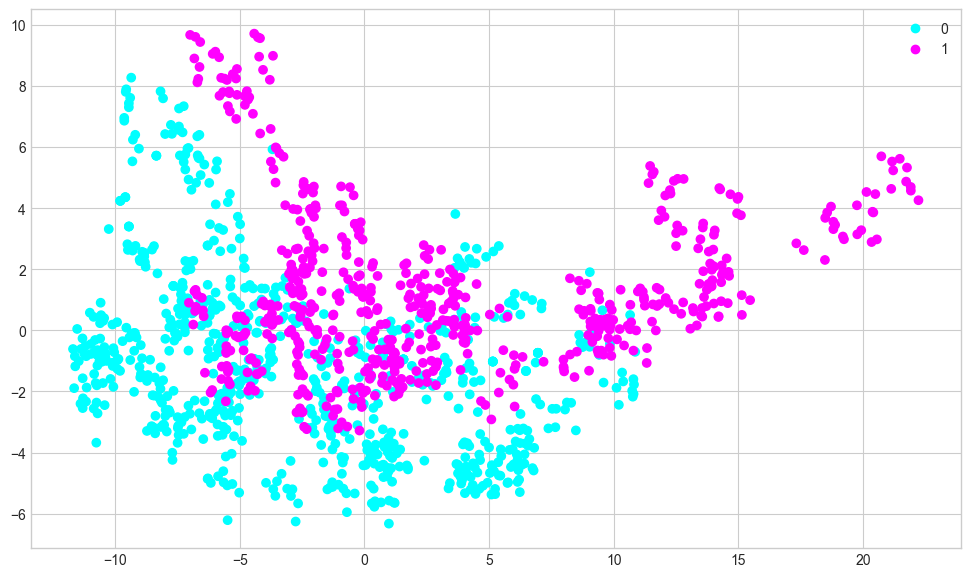

In [29]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
scatter = ax.scatter(pca2_df.pca1, pca2_df.pca2, c=y, cmap="cool")
legend_labels = ['0', '1']  # Thay thế các nhãn bằng nhãn thực tế của bạn
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.show()


Có thể thấy dữ liệu không linearly separable nên sử dụng kernel là ``rbf`` hoặc ``poly``, ngay cả khi sử dụng ``rbf`` hoặc ``poly`` thì cũng chưa chắc có thể phân tách 100% các class.

Các dữ liệu ở phần 1 là nhân tạo và có thể thấy các class tách biệt với nhau 100%, do đó có thể sử dụng hard margin SVC (bằng cách set ``C`` rất lớn (1E6), C rất lớn có nghĩa là loss value sẽ rất lớn cho các điểm bị miss classified, khi C -> $\infty$ thì sorf margin SVC -> hard margin SVC)

Tuy nhiên dữ liệu thực tế thì không thể phân chia một cách rõ ràng như vậy(bộ dữ liệu data_banknote ở trên là 1 ví dụ), do đó sử dụng soft margin SVC(bằng cách set ``C`` nhỏ, cho phép các điểm bị miss classified sẽ hiệu quả hơn và tránh bị overfitting, tuy nhiên nếu set ``C`` quá nhỏ thì có thể dẫn đến underfitting)

## Sử dụng SVC để huấn luyện mô hình với kernel là ``rbf`` 

c:\Users\votua\AppData\Local\Programs\Virtual Enviroment Python\ENV\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


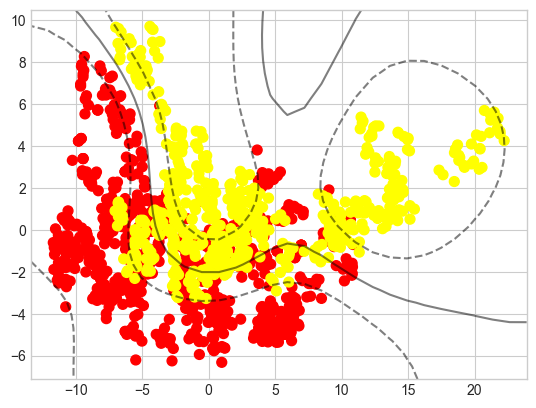

array([[ 6.95754485, -0.73381274],
       [-1.44127541, -3.22525284],
       [10.81296719, -1.77084512],
       ...,
       [-1.00518885, -1.26515996],
       [ 8.78302076,  0.5138289 ],
       [ 3.56524732,  1.03212035]])

In [30]:
model = SVC(kernel='rbf', C=1)
model.fit(pca2_df, y)
plt.scatter(pca2_df.iloc[:, 0], pca2_df.iloc[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, plot_support=False)
plt.show()
model.support_vectors_


## Sử dụng SVC để huấn luyện mô hình với kernel là ``poly`` 

c:\Users\votua\AppData\Local\Programs\Virtual Enviroment Python\ENV\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


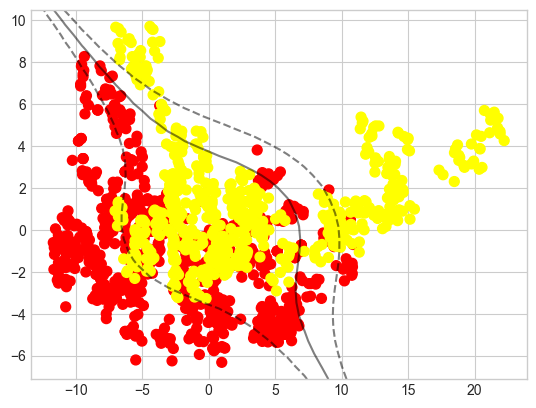

array([[ 3.69019492, -4.37272011],
       [ 6.95754485, -0.73381274],
       [10.81296719, -1.77084512],
       ...,
       [-1.00518885, -1.26515996],
       [ 8.78302076,  0.5138289 ],
       [ 3.56524732,  1.03212035]])

In [44]:
model = SVC(kernel='poly', C=1, degree=3)
model.fit(pca2_df, y)
plt.scatter(pca2_df.iloc[:, 0], pca2_df.iloc[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model, plot_support=False)
plt.show()
model.support_vectors_
